In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [3]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


Build the Linear Regression Model and Plot the regression line


Steps:
In forward propagation, Linear regression function Y=mx+c is applied by initially assigning random value of parameter (m & c).

The we have written the function to finding the cost function i.e the mean



In [4]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Trained the model and Final Prediction


Iteration = 1, Loss = 5117.894121919078
Iteration = 1, Loss = 623.6406481874068
Iteration = 1, Loss = 82.03419510412002
Iteration = 1, Loss = 16.764723338961417
Iteration = 2, Loss = 8.899041638027498
Iteration = 3, Loss = 7.951141346005154
Iteration = 4, Loss = 7.836908997653095
Iteration = 5, Loss = 7.823142709046327
Iteration = 6, Loss = 7.821483673982038
Iteration = 7, Loss = 7.821283694733571
Iteration = 8, Loss = 7.821259547594111
Iteration = 9, Loss = 7.821256590142088
Iteration = 10, Loss = 7.821256186282781
Iteration = 11, Loss = 7.82125609016397
Iteration = 12, Loss = 7.821256031136017
Iteration = 13, Loss = 7.821255976582697
Iteration = 14, Loss = 7.8212559225733935
Iteration = 15, Loss = 7.8212558686344344
Iteration = 16, Loss = 7.821255814708726
Iteration = 17, Loss = 7.821255760789396
Iteration = 18, Loss = 7.82125570687561
Iteration = 19, Loss = 7.82125565296727
Iteration = 20, Loss = 7.821255599064363


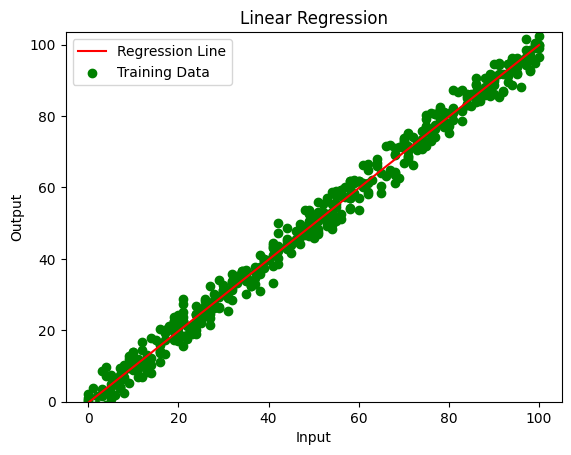

In [5]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Linear Regression Line

The linear regression line provides valuable insights into the relationship between the two variables. It represents the best-fitting line that captures the overall trend of how a dependent variable (Y) changes in response to variations in an independent variable (X).



Positive Linear Regression Line: A positive linear regression line indicates a direct relationship between the independent variable (X) and the dependent variable (Y). This means that as the value of X increases, the value of Y also increases. The slope of a positive linear regression line is positive, meaning that the line slants upward from left to right.


Negative Linear Regression Line: A negative linear regression line indicates an inverse relationship between the independent variable (X) and the dependent variable (Y). This means that as the value of X increases, the value of Y decreases. The slope of a negative linear regression line is negative, meaning that the line slants downward from left to right.


Python Implementation of Multiple Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics


Loading the Boston Housing Dataset

The code downloads the Boston Housing dataset from the provided URL and reads it into a Pandas DataFrame (raw_df)

   


In [7]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
		skiprows=22, header=None)


Preprocessing Data


This extracts the input variables (X) and target variable (y) from the DataFrame. The input variables are selected from every other row to match the target variable, which is available every other row.

In [8]:
X = np.hstack([raw_df.values[::2, :],
		raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


Splitting Data into Training and Testing Sets


Here it divides the data into training and testing sets using the train_test_split() function from scikit-learn. The test_size parameter specifies that 40% of the data should be used for testing.

   


In [9]:
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
					test_size=0.4,
					random_state=1)


Creating and Training the Linear Regression Model
This initializes a LinearRegression object (reg) and trains the model using the training data (X_train, y_train)

   


In [10]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

Creating and Training the Linear Regression Model

This initializes a LinearRegression object (reg) and trains the model using the training data (X_train, y_train)

   


In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

Evaluating Model Performance


Evaluates the model’s performance by printing the regression coefficients and calculating the variance score, which measures the proportion of explained variance. A score of 1 indicates perfect prediction.

   


In [12]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266174


Plotting Residual Errors


Plotting and analyzing the residual errors, which represent the difference between the predicted values and the actual values.

   


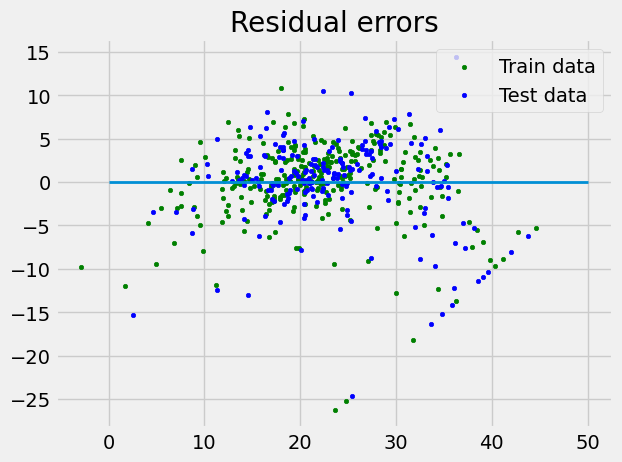

In [13]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
			reg.predict(X_train) - y_train,
			color="green", s=10,
			label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
			reg.predict(X_test) - y_test,
			color="blue", s=10,
			label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()
